### Import Required Libraries 

In [639]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
plt.style.use('ggplot')

### Import Required the Data Set

In [640]:
# Import the dataset
data = pd.read_csv('Cancer_Dataset.csv')

# Check the dimensionality
data.shape

(768, 9)

So we get the number number of rows(observations) as 768 and the number of columns(variables) as 9.

We have 8 independent variables and one target variable.

In [641]:
# Check a sample of the data 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [642]:
# Find if any values are missing or null or in an incorrect data type.
# We use info() for this. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancies     768 non-null    int64  
 1   Glucose         768 non-null    int64  
 2   BloodPressure   768 non-null    int64  
 3   SkinThickness   768 non-null    int64  
 4   Insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   Cancer_Markers  768 non-null    float64
 7   Age             768 non-null    int64  
 8   Outcome         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We find that there are 9 variables and 768 observations and none of the columns in any observation are missing or null,
because each column has 768 non-null values.

All the independent variables are numerical.

In [643]:
# Check if any features have 0 values

In [644]:
data.loc[(data['Glucose'] == 0)]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [645]:
data.loc[(data['BloodPressure'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [646]:
data.loc[(data['SkinThickness'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [647]:
data.loc[(data['Insulin'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [648]:
data.loc[(data['BMI'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [649]:
data.loc[(data['Cancer_Markers'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome


In [650]:
data.loc[(data['Age'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome


In [651]:
# Lets distribute the variable labels into two lists of Features and Target respectively
Features = data.columns[:-1] 
Target = data.columns[-1] 

In [652]:
# Replace 0 values with medians.
# Loop through the list of features
# replace 0 with median of column
# i=1

for i in Features:
    data[i]=(data[i].replace(0,data[i].median()))

In [653]:
# Now that we know that our dataset doesn't have missing values,null values or values with wrong data-types, 
# lets look at the statistical summary of the numerical data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Here the count, mean, std, min and max show the number of values, average value, the standard deviation, minimum value and maximum value of each column respectively 25%, 50%,75% show the 25th percentile(1st quartile), 50th percentile(median/2nd quaritle) and the 75th percentile(3rd quartile) respectively.
This means that 25% of the values in Age column are < 24, 50% are < 29 etc.

### Investigation of Presence of Correlation

In [654]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
Pregnancies,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
Cancer_Markers,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


We can see that the highest correlation is between BMI and SkinThickness followed by between Age and Pregnancies but even these values are not close to 0.7 so the independent variables are not highly corelated and therefore we can't drop any of them.

### Histograms of each Numerical Variable

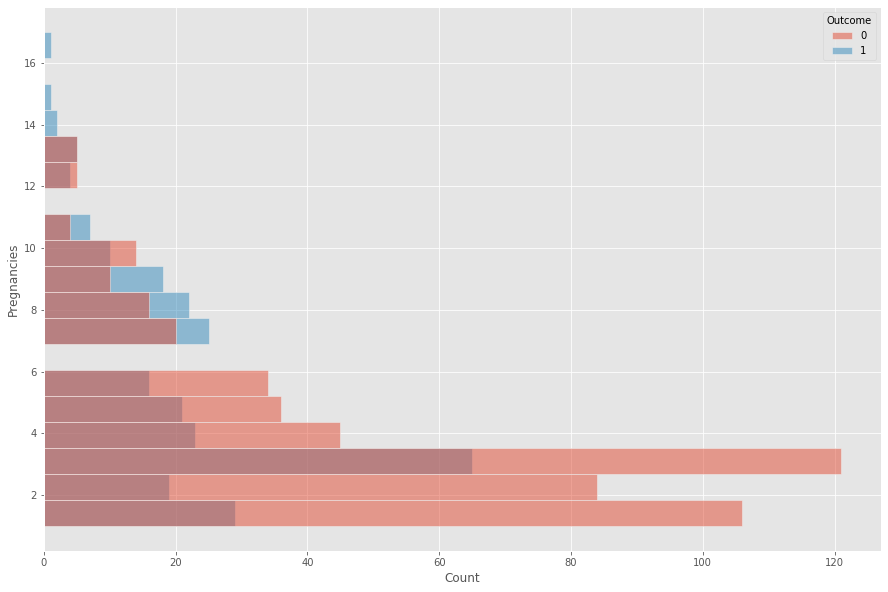

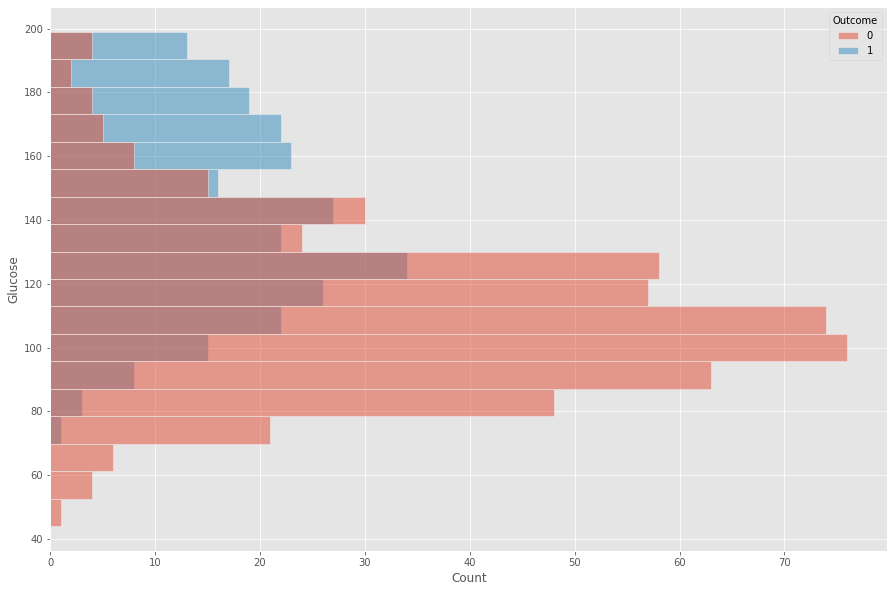

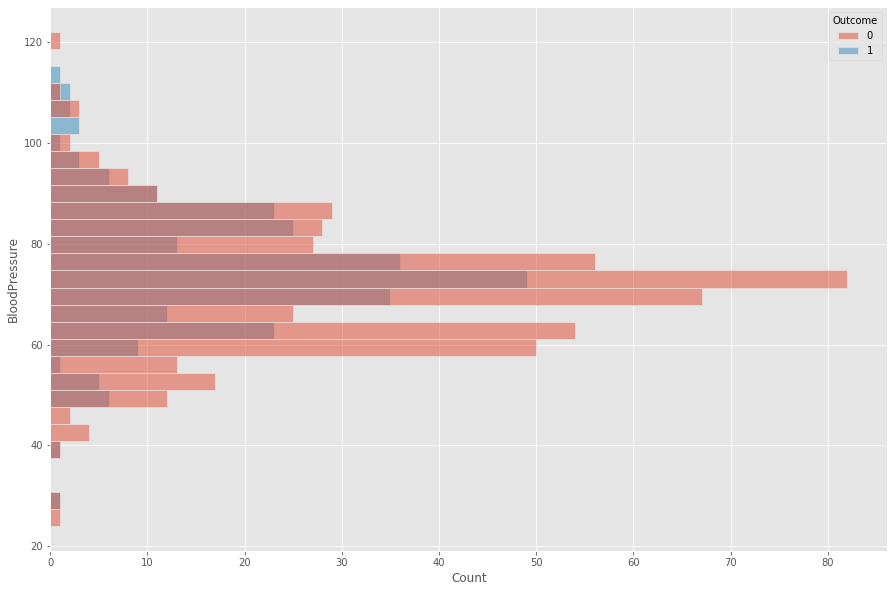

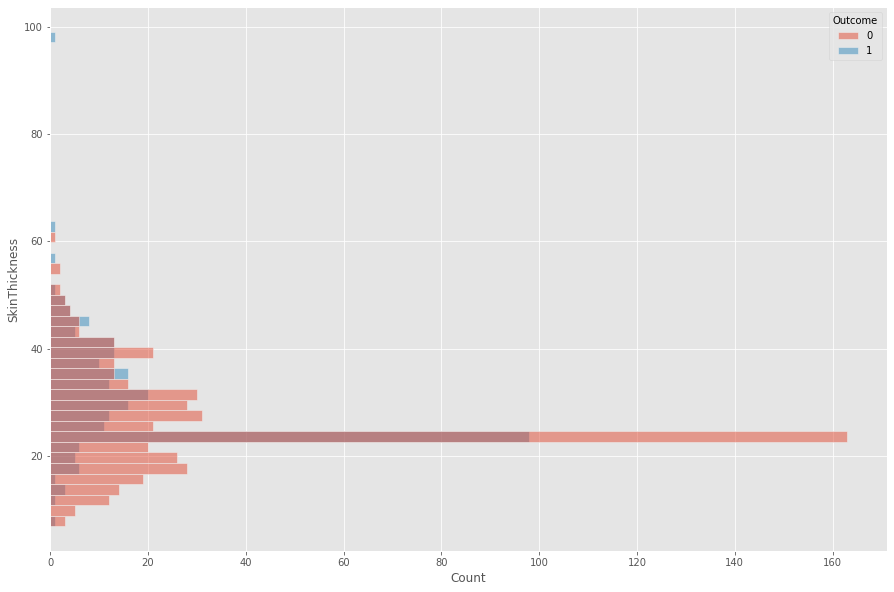

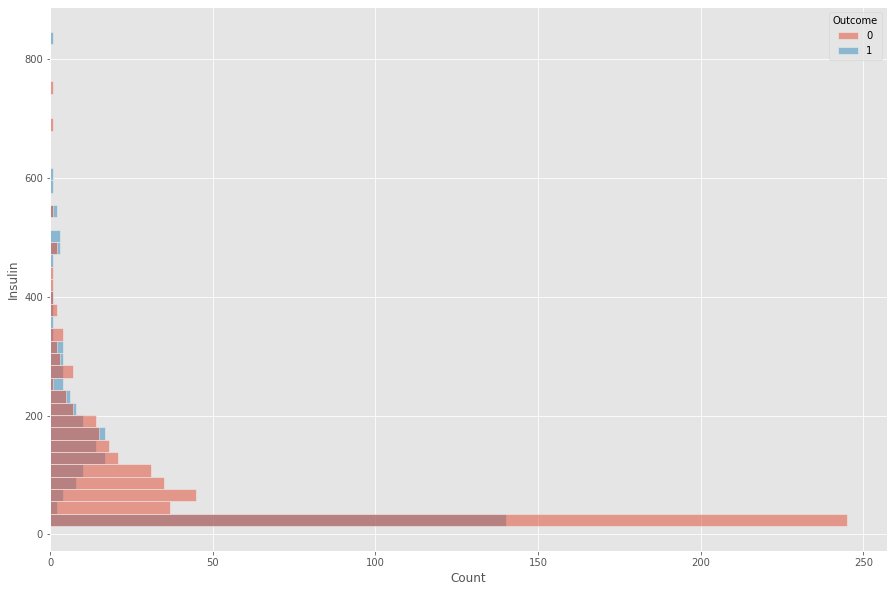

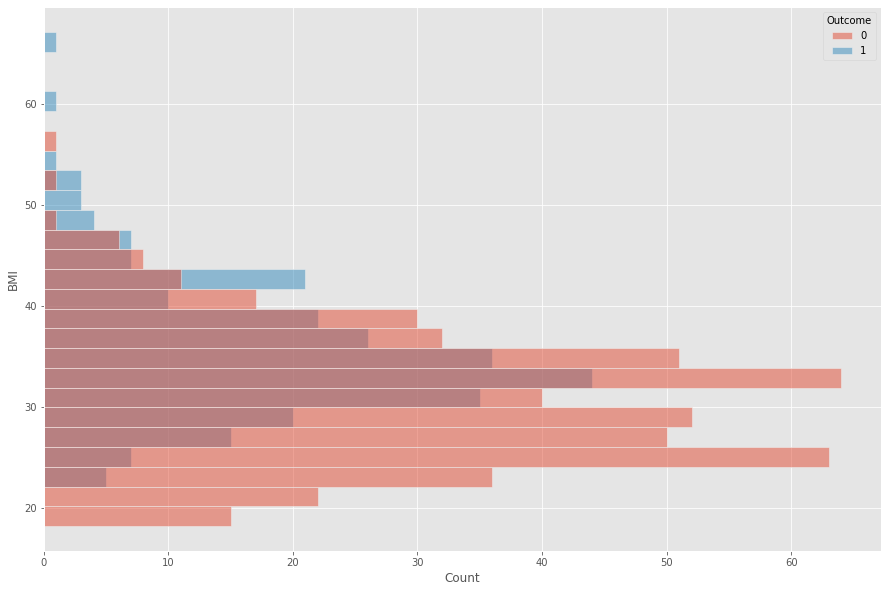

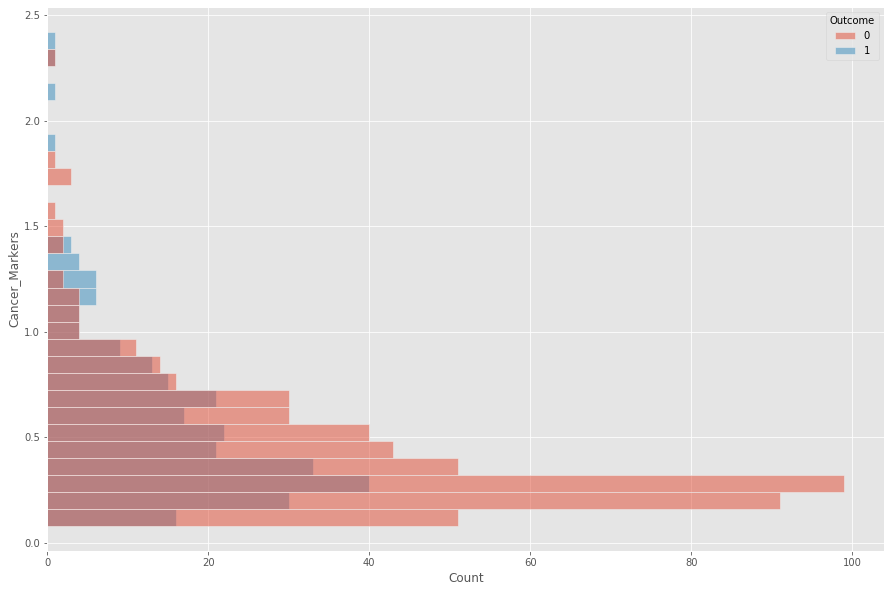

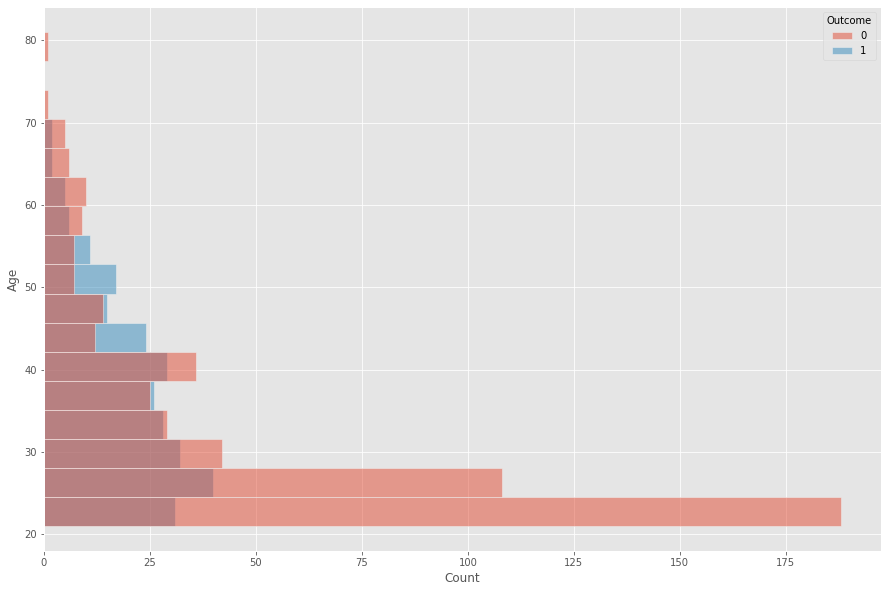

In [655]:
# Loop through the numerical variables and plot the histogram for each variable
for i in Features:
    plt.figure(figsize=(15, 10))
    sns.histplot(y = i, hue = 'Outcome', data = data)
    plt.show() 

From the histograms we can see that for each value of the BloodPressure, SkinThickness and Insulin variables, the pattern of the values of the target variable is mostly similar. This indicates that the target variable is less dependent on these variables.

On the other hand as the value of the Pregnancies, Glucose, BMI ,Cancer_Markers and Age variables change, the pattern of values of the target variable changes dramatically. This indicates that the target variable is more dependent on these variables

The independent variables on which the dependent variable has high dependency will play a significant role.

In [656]:
# Lets check which of the variables show the highest corelation with the response variable charges
# This can be done using corr()
corr_matrix = data.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome           1.000000
Glucose           0.492782
BMI               0.312249
Pregnancies       0.245466
Age               0.238356
SkinThickness     0.189065
Cancer_Markers    0.173844
BloodPressure     0.165723
Insulin           0.148457
Name: Outcome, dtype: float64

Here we can see the variables in the descending order of their corelation with the response variable Outcome. Since the variable Outcome is 100% corelated with itself the value for Outcome is 1.

Further we can see that the next variable with the highest corelation is Glucose, followed by BMI and so on. 
It's also apparent that SkinThickness and the BloodPressure have the least corelation with the Outcome

### Create and train the machine learning model using KNN SK-Learn library

### Normalize the required columns using min max

In [657]:
# Loop through the list of column names to be normalized
# Derive the normalized value for each column by taking (val - min_of_val)/(max_of_val - min_of_val) 
# Store in a column named Normalized val (where val is the column name)
i=1

for i in Features:
    data[i]=(data[i]-data[i].min())/(data[i].max()-data[i].min())

In [658]:
# Let's put the best features in array X and target in array y

X = data.drop(['Outcome','Cancer_Markers','Insulin'],axis=1).values
Y = data.iloc[:,-1].values

We will train using the knn classifier on the training set and make predictions on the test set. Then we will compare the predictions with the known labels.

In [659]:
# Split the dataset into the Training set and Test set in the ratio of 60:40. We use "stratify" so the proportion of labels is the same in splits
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=42, stratify=Y)

In [660]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model using knn classifier
    knn.fit(X_train, Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    #print("Training accuracy for",i,"is", train_accuracy[i])
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test) 
    test_accuracy[i]
    print("Accuracy for",i+1,"is", test_accuracy[i])

Accuracy for 1 is 0.7532467532467533
Accuracy for 2 is 0.7272727272727273
Accuracy for 3 is 0.7792207792207793
Accuracy for 4 is 0.7402597402597403
Accuracy for 5 is 0.7922077922077922
Accuracy for 6 is 0.7922077922077922
Accuracy for 7 is 0.8441558441558441
Accuracy for 8 is 0.8051948051948052
Accuracy for 9 is 0.7792207792207793
Accuracy for 10 is 0.7792207792207793
Accuracy for 11 is 0.7662337662337663
Accuracy for 12 is 0.7662337662337663
Accuracy for 13 is 0.7662337662337663
Accuracy for 14 is 0.7272727272727273
Accuracy for 15 is 0.7402597402597403
Accuracy for 16 is 0.7402597402597403
Accuracy for 17 is 0.7272727272727273
Accuracy for 18 is 0.7402597402597403
Accuracy for 19 is 0.7272727272727273


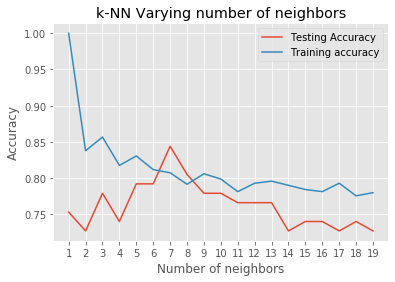

In [661]:
#Generate plot

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.xticks(range(1, 20))
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [687]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)
#Fit the model
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [688]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,Y_test)

0.8441558441558441

### Confusion Matrix

Confusion matrix can be obtained using crosstab method of pandas.

In [689]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,44,6,50
1,6,21,27
All,50,27,77


In [690]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        50
           1       0.78      0.78      0.78        27

    accuracy                           0.84        77
   macro avg       0.83      0.83      0.83        77
weighted avg       0.84      0.84      0.84        77



### ROC (Reciever Operating Charecteristic) curve

In [691]:
Y_pred_proba = knn.predict_proba(X_test)[:,1]
Y_predict= knn.predict(X_test)
for i in range(70):
    print(Y_test[i],Y_predict[i],Y_pred_proba[i],"\n")
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)

0 0 0.0 

1 1 0.5714285714285714 

1 1 0.5714285714285714 

1 1 0.5714285714285714 

0 0 0.0 

0 0 0.14285714285714285 

1 1 0.5714285714285714 

1 1 0.7142857142857143 

0 0 0.14285714285714285 

0 0 0.42857142857142855 

0 0 0.2857142857142857 

0 0 0.14285714285714285 

1 1 0.5714285714285714 

0 0 0.0 

0 0 0.2857142857142857 

1 1 1.0 

0 0 0.0 

1 1 0.8571428571428571 

0 0 0.0 

0 0 0.0 

0 0 0.14285714285714285 

0 0 0.14285714285714285 

0 0 0.2857142857142857 

0 0 0.14285714285714285 

0 0 0.0 

0 0 0.0 

0 0 0.14285714285714285 

1 0 0.14285714285714285 

0 0 0.0 

0 0 0.0 

0 1 0.8571428571428571 

1 1 1.0 

0 0 0.42857142857142855 

0 0 0.14285714285714285 

1 1 0.7142857142857143 

0 0 0.2857142857142857 

0 0 0.42857142857142855 

1 1 0.7142857142857143 

0 0 0.0 

0 0 0.42857142857142855 

0 0 0.14285714285714285 

0 1 0.5714285714285714 

1 1 0.7142857142857143 

0 0 0.0 

0 0 0.0 

0 0 0.42857142857142855 

1 0 0.2857142857142857 

0 1 0.5714285714285714 

1 1 0.7142

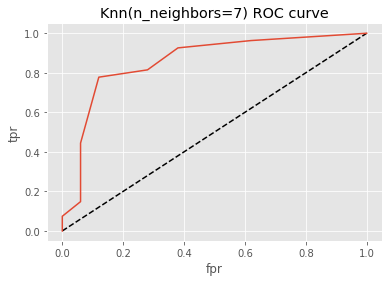

In [692]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [693]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred_proba)


0.8574074074074074

Hyperparameter tuning :-

The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.

There is a better way of doing it :- Grid Search cross-validation.

### Grid Search cross-validation

In [694]:
#GridSearchCV implements a “fit” and a “score” method.
from sklearn.model_selection import GridSearchCV


In [695]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,30)}

In [696]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [697]:
knn_cv.best_score_

0.7695951107715814

In [698]:
knn_cv.best_params_

{'n_neighbors': 20}